<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/time-series/ManilaClimateData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.style.use('seaborn')

df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv', header=0, parse_dates=[0])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [13]:
df.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [14]:
df = df[['dt', 'AverageTemperature', 'Country']]

  
# selecting rows based on condition
new_df = df.loc[df['Country'] == 'Philippines']
new_df['AverageTemperature'].fillna(new_df['AverageTemperature'].median(), inplace =True)



/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
new_df['Year'] = new_df['dt'].dt.year
new_df.head()

<ipython-input-15-50d6accffff9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = new_df['dt'].dt.year


,dt,AverageTemperature,Country,Year
141568,1845-01-01,24.995,Philippines,1845
141569,1845-02-01,24.630,Philippines,1845
141570,1845-03-01,26.512,Philippines,1845
141571,1845-04-01,26.377,Philippines,1845
141572,1845-05-01,27.564,Philippines,1845


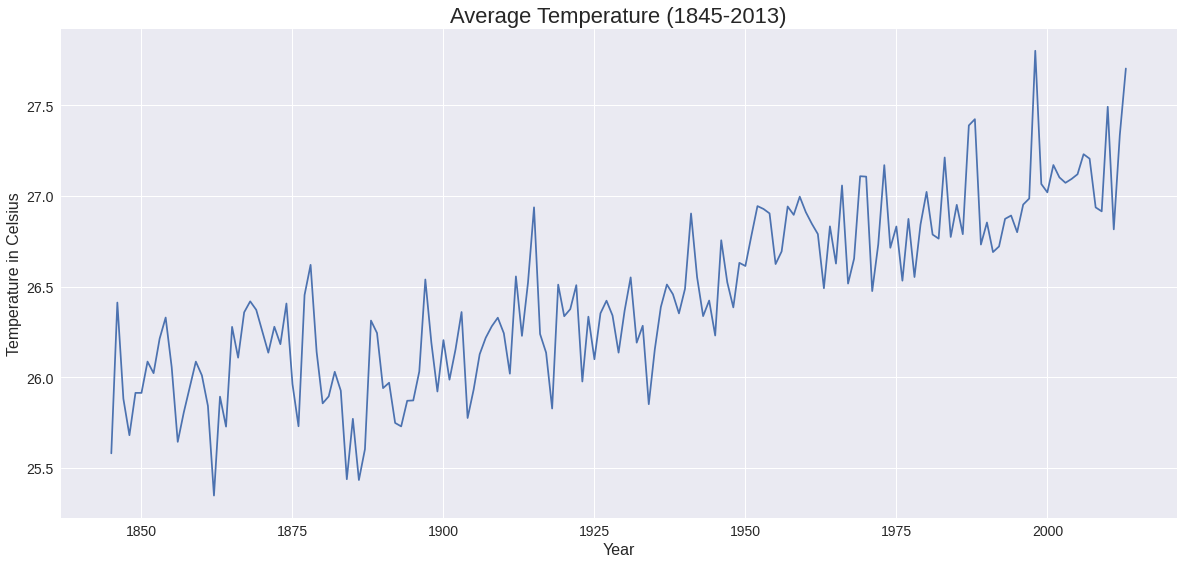

In [16]:
plt.figure(figsize=(20,9))
new_df.groupby('Year')['AverageTemperature'].mean().plot()
plt.title('Average Temperature (1845-2013)', fontsize=22)
plt.ylabel('Temperature in Celsius', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


plt.savefig('temp.png')


In [17]:
ndf = new_df.pivot_table(index='Year', columns='Country', values='AverageTemperature', aggfunc='mean')
ndf

Country,Philippines
Year,
1845,25.581750
1846,26.412917
1847,25.882500
1848,25.681583
1849,25.915083
...,...
2009,26.915917
2010,27.492333
2011,26.816500


In [18]:
ndf.tail()

Country,Philippines
Year,
2009,26.915917
2010,27.492333
2011,26.816500
2012,27.336417
2013,27.703222


In [19]:
ndf = ndf.reset_index(level=0)
ndf.columns

Index(['Year', 'Philippines'], dtype='object', name='Country')

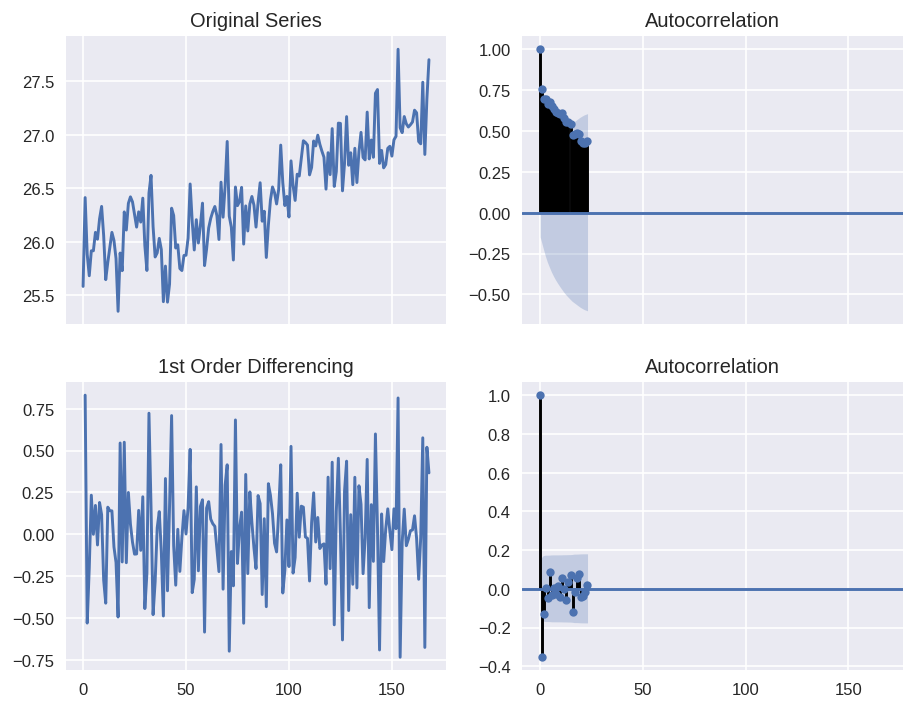

In [26]:
# Importing the modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# fixing the size
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(ndf.Philippines); axes[0, 0].set_title('Original Series')
plot_acf(ndf.Philippines, ax=axes[0, 1])

# 1st Differencing to make stationary time series data
axes[1, 0].plot(ndf.Philippines.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(ndf.Philippines.diff().dropna(), ax=axes[1, 1])
plt.show()
plt.show()

In [27]:
# importing the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ( arima p d q )
model = ARIMA(ndf.Philippines, order=(1,1,1))

# Training arima modeling 
model_fit = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


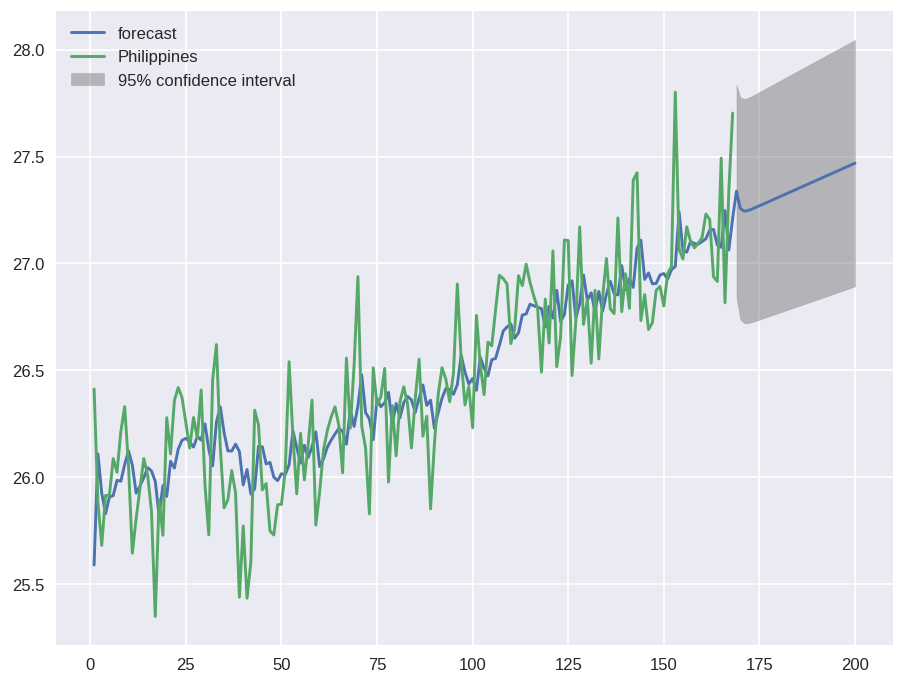

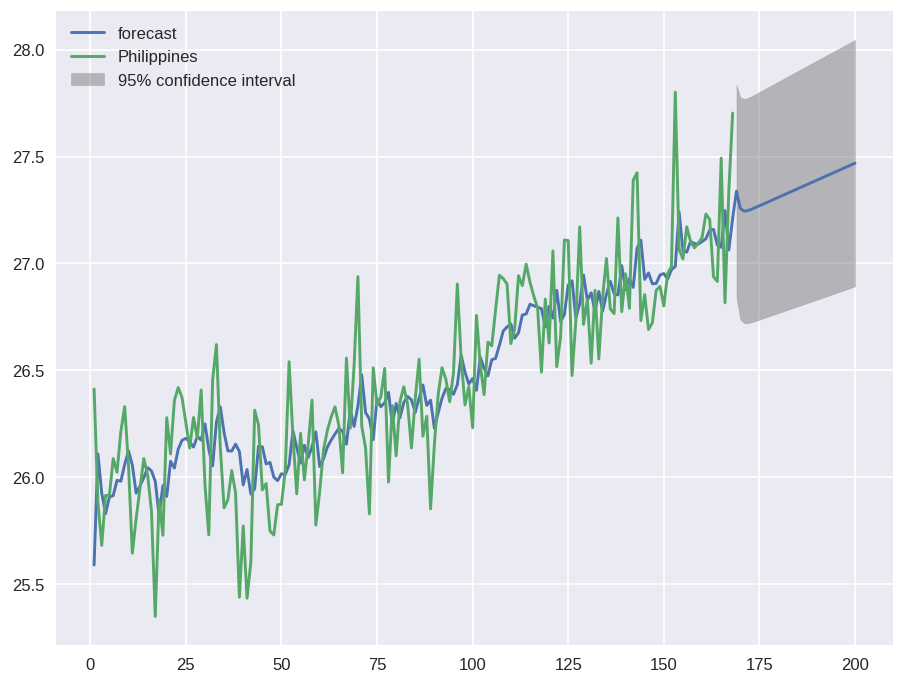

In [45]:
# arima model results
model_fit.plot_predict(1,200)

